1.	**The names of team member(s)**:

    Atharva Fulay

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

Need these packages:
 - pandas, matplotlib.pyplot, argparse, BeautifulSoup (from bs4 import BeautifulSoup), requests, time, csv
    
Command-line switches:
 - source. Determines where to get data from. "local" will use the locally stored datasets. "remote" and "test" will pull from swingtradebot.com, Yahoo Finance, and call the Alphavantage API. "test" pulls only one page instead of 10 which "remote" does. 
 - overwrite. 1 means it will overwrite (or write if it doesn't exist) to the file. 0 means it will complete the analysis without writing any files.
 
When you run the program, it will output some messages regarding the 'overwrite' switch, and will continue to log its progress as it goes. It will generate an image (which has to be closed for the program to finish). 

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**

    * The Alphavantage API has a limit of 5 calls per minute. This means the "remote" call will take about 40-45 minutes and the "test" will take about 5 minutes. 
    * One thing about the Alphavantage API is that some of the stocks aren't traded everyday, so it is possible that some stocks are missing from days that the program expects to be. Though the program should catch most of these, I am not able to test it for all potential inconsistent data. There may be an error if there is a situation that I didn't encounter while testing. 
    * If run through the command line, you will have to close the image generated for the program to finish. 

4.  **Anything else you feel is relevant to the grading of your project your project.**

It seems once you've created analysis_dict, it doesn't change even rerunning the cell or reimporting the package. You have to restart the kernel to see the new values.

If run through the command line with overwrite=1, the program will generate (or overwrite) a sector_analysis csv which shows the exact numbers of the sector performances and an image with the graph of the performances. 

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

In the stock market, which is the best performing sector over the last 100 days, and what symbols make up that sector?

I initially wanted to look at historical stock prices to see which sector was performing the best. I started out hoping I could do a large analysis of years of stock prices, but that data ended up being too large. What I pivoted to is getting the top 200 symbols traded by average volume and their prices for the past 100 days. If I put in $1000 per symbol and grouped the symbols by sector, how would each sector perform? The program displays a graph of how the sectors performed, which sector was best (in terms of percent gain/loss), and which symbols make up that top perfoming sector. 

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

At least of the most recent running, the "Industrials" sector was the best sector with returns of above 20% and the symbols within that sector are ['GE', 'FCEL', 'PLUG', 'AAL', 'DAL'].

If you run this on another day (using remote or test), it may result in a different sector / symbols. 

7. **What difficulties did you have in completing the project?**

It was kind of difficult to pivot after my initial idea seemed too much. I wanted the idea to be the simliar but on a smaller scale. But if I tried to get top 3 symbols within each sector, the scrape would have taken forever (since some of the other top performing symbols within sectors are not often traded). So I chose to take the top 200 by volume, resulting in pretty much a constant scrape time. Even now, I feel kind of uneasy that I'm taking the top 200 stocks by volume. This could mean that some sectors have 40 symbols while other have 5. 

8. **What skills did you wish you had while you were doing the project?**

Pandas and MatPlotLib are extremely useful and can pretty much do everything by default methods that one would want. Only thing is finding and knowing the methods and their arguments. The naming convention for pandas is kind of confusing ".groupby()" vs ".sort_values()" or having to use a list for getting a subset of column names ( df['col_a', 'col_b'] (intuitive) vs df[['col_a', 'col_b']] (how it actually works) ). 

Not something that can be taught really -- more of something that is learned from experience and using it. 

9. **What would you do “next” to expand or augment the project?**

    * Like I mentioned in Question 7, I want to see if there is an easier way to get the top N in a sector without having to scrape Yahoo Finance for every symbol to see if it is in the sector I'm looking for. Another issue is Yahoo Finance is kind of inconsistent. In their menu they list approximately 10 sectors, but in their symbols, there are about 16 (one of which was Consumer Goods - AAPL, which is in the top 20). Hopefully there is another resource that can return the result faster.

    * I also had the plan of looking past only symbols and sectors, maybe looking at indicators (which Alphavantage offers) or some other trackable value. Long term, I would like to set up a simple ML model to decide which symbols / sectors are moving and where to invest money (either buying or shorting).

    * Lastly, make it more robust to handle any and all situations that occur in the market / data provided by Alphavantage.

I don't think it would have made a vast difference if I had the skills from section 8. However, it would make me faster since I would not have to Google some obscure pandas method or argument every two minutes. 

Note: "analysis" and "main_driver" are Python files that I have written (please make sure they exists in the same directory as this notebook). It is included in the directory https://github.com/atharvafulay/inf510_project/blob/master/src/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import main_driver as md
import analysis as an

Load the data into a pandas dataframes.

In [12]:
symbols_df, prices_df = md.local_driver()

Successfully read symbols.csv
Successfully read ninety_day_historical_prices.csv


The symbols_df dataframe contains peripheral information about the symbol and the company behind the symbol. Fields such as the company name, phone number, website, headquarter location, number of full time employees, and, most importantly, sector. You'll notice that the dataframe is ordered by 'avg_volume' descending. Again, remember that these symbols are the top 200 symbols traded by volume. They were scraped by ordering the avg_volume field and taking the top 200.

In [3]:
# take a quick glimpse of what the data looks like
print(symbols_df.shape)
symbols_df.head()

(200, 13)


,symbol,name,close_price,volatility,avg_volume,phone,website,city,country,sector,industry,fte,description
0,CHK,Chesapeake Energy...,0.78,47.552,79046037,405-848-8000,http://www.chk.com,Oklahoma City,United States,Energy,Oil & Gas E&P,2350.0,Chesapeake Energy Corporation engages in the a...
1,GE,General Electric ...,11.44,8.519,52825073,617-443-3000,http://www.ge.com,Boston,United States,Industrials,Specialty Industrial Machinery,283000.0,General Electric Company operates as a high-te...
2,AMD,Advanced Micro De...,42.59,9.851,50745014,408-749-4000,http://www.amd.com,Santa Clara,United States,Technology,Semiconductors,10100.0,"Advanced Micro Devices, Inc. operates as a sem..."
3,BAC,Bank of America C...,34.68,5.319,47163146,704-386-5681,http://www.bankofamerica.com,Charlotte,United States,Financial Services,Banks—Diversified,209000.0,"Bank of America Corporation, through its subsi..."
4,NIO,NIO Inc.,2.27,43.706,37060096,86 21 6908 3306,http://www.nio.com,Shanghai,China,Consumer Cyclical,Auto Manufacturers,7800.0,"NIO Limited designs, manufactures, and sells e..."


The prices_df has 10 columns but the ones we care about are 'symbol', '1.open', '8. split coefficient'. It contains 100 records of each symbol for the past 100 business days (days it was traded) in order by date descending. You'll note that there are 19,771 rows (may vary if you overwrote the ninety_days_historical_prices file) instead of the 20,000 we would expect. This is likely due to one of two situations: 1) some of the symbols that were initially scraped are not registered in Alphavantage. 2) The symbol was not traded every single business day.  In order to get results, the analysis portion ignores symbols that aren't traded on every business day. 

In [13]:
print(prices_df.shape)
prices_df.head(105)

(19771, 10)


,symbol,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,CHK,2019-12-12,0.7500,0.8000,0.7484,0.7826,0.7826,66274521,0.0,1.0
1,CHK,2019-12-11,0.7833,0.7874,0.7200,0.7451,0.7451,48932341,0.0,1.0
2,CHK,2019-12-10,0.8042,0.8480,0.7600,0.7752,0.7752,83978545,0.0,1.0
3,CHK,2019-12-09,0.7570,0.7944,0.7440,0.7896,0.7896,60127555,0.0,1.0
4,CHK,2019-12-06,0.7257,0.7686,0.7211,0.7601,0.7601,66148145,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
100,GE,2019-12-12,11.3500,11.5700,11.2400,11.4400,11.4400,99858285,0.0,1.0
101,GE,2019-12-11,10.9700,11.0900,10.9500,10.9700,10.9700,32658175,0.0,1.0
102,GE,2019-12-10,10.9900,11.0300,10.9200,11.0100,11.0100,24780813,0.0,1.0
103,GE,2019-12-09,10.9800,11.1300,10.9700,10.9900,10.9900,26695558,0.0,1.0


Now, we want to split the symbols into their sectors. 

In [14]:
sectors = symbols_df.groupby('sector')['symbol'].apply(list)

In [15]:
# here is an example of all the symbols in the "Basic Materials" sector
sectors[0]

['FCX',
 'VALE',
 'X',
 'AUY',
 'CLF',
 'KGC',
 'GOLD',
 'GGB',
 'AKS',
 'HL',
 'GFI',
 'CX',
 'NEM',
 'CTVA',
 'BTG',
 'CDE']

Let's run the analysis now. What the calclulations function does is it takes the valid* symbols within each sector, and assumes you invested \\$1000 into every symbol. Since this is a hypothetical situation (and more about the performance than the actual investment amount), it invests exactly \\$1000, not in increments of the stock that \\$1000 would buy. All symbol prices use the open price ('1. open' in the dataframe). 

Then, it takes that monetary amount (assuming you invested exactly 100 business days ago) and looks at the percentage gain or loss that specific sector would result in throughout the 100 day period. The dictionary analysis_dict contains that performance information. (the key is the name of the sector, and the value is a list of percent values that the sector performed at). 

There are a couple of caveats to note. The reason we care about '8. split coefficient' is because if a stock split  1 into 7, then its price will be one seventh its expected value. So to get the value we care about, we multiply the number of stocks to the price _and_ to the coefficient value. By default the program looks at the performance every 5 business days (approximately one week). One easy feature to add in the future would be to let users choose the frequency. 

valid*, in this case, means that the stock was traded every business day from the past 100 days. 

In [16]:
# this may take a couple of seconds to run

# also, there seems to be an issue with the analysis_dict that is generated IF you are running this a second 
# or subsequent time. You'll have to restart the kernel to see it if the values have changed. 
analysis_dict, dates = an.calculations(sectors, prices_df)

In [17]:
# put the generate dictionary into a dataframe and set the columns to the dates list
sector_analysis_df = pd.DataFrame.from_dict(analysis_dict).T
sector_analysis_df.columns = dates
sector_analysis_df

,2019-07-24,2019-07-31,2019-08-07,2019-08-14,2019-08-21,2019-08-28,2019-09-05,2019-09-12,2019-09-19,2019-09-26,...,2019-10-10,2019-10-17,2019-10-24,2019-10-31,2019-11-07,2019-11-14,2019-11-21,2019-11-29,2019-12-06,2019-12-12
Basic Materials,0.0,1.618228,-0.243825,-3.640631,-4.907926,-3.272563,-1.282961,0.638900,-3.711755,-1.580121,...,-5.351480,-6.485158,-4.069783,-1.080916,1.037704,0.062837,1.205072,2.713125,7.630581,12.200276
Communication Services,0.0,3.289876,-1.362737,0.092223,2.045318,0.239396,2.776942,4.809483,3.341670,-0.711339,...,-4.635344,-0.890199,-3.478564,4.729413,4.317351,0.042293,-0.702298,0.615590,-1.005776,-2.356738
Consumer Cyclical,0.0,0.168759,-7.454223,-9.946957,-8.943015,-13.416383,-8.180660,0.892770,-3.823162,-7.051291,...,-8.558763,-3.480607,-1.775181,-0.090617,5.299108,3.416701,1.667984,6.914555,6.439218,7.614852
Consumer Defensive,0.0,2.680847,0.559101,-0.911261,-0.978056,-2.094025,1.593406,4.112687,2.706496,2.508168,...,-0.603658,-0.353153,2.273843,1.910122,4.192566,3.512106,3.156282,4.495979,6.681651,8.033068
Energy,0.0,-2.120652,-17.391321,-18.297973,-14.521827,-20.688237,-15.925538,-10.437438,-6.593809,-12.958863,...,-22.322414,-20.309205,-16.961646,-19.695353,-15.388060,-18.957111,-23.705355,-23.790752,-23.465476,-19.637163
Financial Services,0.0,-0.914510,-8.211727,-9.401894,-8.666058,-11.164852,-7.256703,-3.767006,-3.336522,-4.120051,...,-7.980085,-2.133223,0.121518,-0.254283,3.291982,1.604286,1.335526,2.679214,3.638858,3.644365
Healthcare,0.0,-0.377465,-8.197133,-10.696568,-10.072069,-15.957117,-13.601831,-7.450312,-11.040545,-16.346087,...,3.331656,13.572943,10.966932,3.423534,2.810351,-9.791235,-12.856736,-6.601030,-4.951666,-3.803027
Industrials,0.0,-2.230575,-9.309837,-10.177963,-11.342485,-15.246218,-8.737540,-3.130509,0.867673,-5.313994,...,-10.201733,-7.300949,-3.441034,-8.012001,10.973537,39.453849,36.989817,32.472540,15.985439,20.403728
Real Estate,0.0,0.512904,-2.464299,-2.365718,-2.000407,-3.919444,-1.301856,0.545602,0.947932,1.872696,...,0.360295,-0.007578,3.065547,2.914199,1.152006,1.183494,2.989307,5.175873,6.042064,4.022799
Technology,0.0,1.031453,-7.455501,-7.257060,-5.660923,-10.137124,-7.906959,-5.624997,-6.135865,-8.284400,...,-11.196065,-7.681667,-9.212275,-7.217843,-5.356057,-5.404736,-5.529192,-3.833027,-4.772460,-3.602625


You'll notice it is all relative to 0. So on day 0, your gain/loss is 0. Looking at the Basic Materials sector: after the first period (day 5 by default) you've gained 1.6% (can vary if you've replaced the file with newer numbers), are down 0.2% by the second period  (day 10), and so on. It's important to note all these values are in relation to the initial investment, not a week over week performance. The last column's values are the amount you would have gained/lost for that sector if you didn't touch the initial investment over the 100 business days. But it's boring to see just numbers, let's visualize this. 

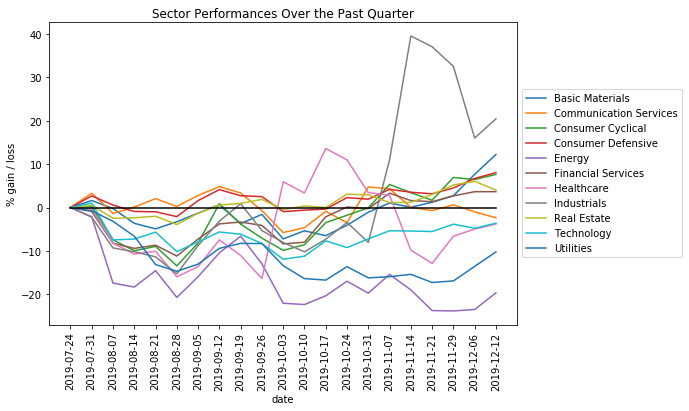


------
The best performing sector was Industrials, improving by 20.4 percent over the past 100 days.


In [9]:
# the 0 in the arguments is whether the user wants this image saved or to overwrite the one that exists
# shift+tab on generate_image for documentation

best_perf_sector = an.generate_image(analysis_dict, dates, 0)

Quite a lot of movement! At the time of writing, it looks like roughly half the sectors are above 0, and half below. Energy is at bottom near -20% while Industrials leads the pack at 20.4% (as the message shows). Though, maybe you should have sold about a month ago!  Well, that's great and all, but can you tell me off the top of your head the symbols within Industrials? Mhm, thought so. Worry not!

In [10]:
best_symbs = sectors[best_perf_sector]
best_symbs

['GE', 'FCEL', 'PLUG', 'AAL', 'DAL']

Boom! If you invested in exactly \\$1000 in these stocks exactly 100 business days ago, you would have made over 20\% returns! Take it one step further and find out more about these companies!

In [18]:
symbols_df[symbols_df['symbol'].isin(best_symbs)]

,symbol,name,close_price,volatility,avg_volume,phone,website,city,country,sector,industry,fte,description
1,GE,General Electric ...,11.44,8.519,52825073,617-443-3000,http://www.ge.com,Boston,United States,Industrials,Specialty Industrial Machinery,283000.0,General Electric Company operates as a high-te...
14,FCEL,"FuelCell Energy, ...",0.71,66.889,23460267,203-825-6000,http://www.fuelcellenergy.com,Danbury,United States,Industrials,Electrical Equipment & Parts,489.0,"FuelCell Energy, Inc., together with its subsi..."
83,PLUG,"Plug Power, Inc.",3.14,34.428,8734876,518-782-7700,http://www.plugpower.com,Latham,United States,Industrials,Electrical Equipment & Parts,575.0,"Plug Power Inc., an alternative energy technol..."
125,AAL,American Airlines...,27.72,10.628,6772985,817-963-1234,http://www.aa.com,Fort Worth,United States,Industrials,Airlines,131900.0,"American Airlines Group Inc., through its subs..."
151,DAL,"Delta Air Lines, ...",56.69,4.854,6117756,404-715-2600,http://www.delta.com,Atlanta,United States,Industrials,Airlines,80000.0,"Delta Air Lines, Inc. provides scheduled air t..."


However, the results do bring up one shortcoming that I mentioned at the top of this notebook. Since there is no quick way to get the top N symbols in each sector, it kind of skews the data to the sectors with a smaller number of symbols in it. For example, (as of this run) Industrials has 5 symbols in it while Technology had 27. Thus, the weight of each symbol in the Industrials stock is larger than a stock in Technology. It could be that the top 5 in Technology outperformed these top 5 from Industrials. This is something I want to resolve in the future. 